<a href="https://colab.research.google.com/github/UdaraN98/ANN_from_scratch/blob/main/JAX_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Loading and splitting



In [2]:
import jax.numpy as jnp
from jax import grad, jit, vmap
from jax import random

import pandas as pd
import matplotlib.pyplot as pt

In [3]:

import os

os.environ["KAGGLE_USERNAME"] = "udaranilupul"
os.environ["KAGGLE_KEY"] = "6dfcfe5d3d6742ee54551761419ffeac"


In [4]:
!kaggle competitions download -c digit-recognizer

 59% 9.00M/15.3M [00:00<00:00, 68.1MB/s]
100% 15.3M/15.3M [00:00<00:00, 101MB/s] 


In [5]:
!apt-get install p7zip-full

Reading package lists... Done
Building dependency tree       
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-7build1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [ ]:
!7za x "digit-recognizer.zip"

In [7]:
#loading the dataset 

data  = pd.read_csv("/content/train.csv")

In [8]:
#dividing the data into training and validation sets

data  = jnp.array(data)
m,n = data.shape

In [9]:
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

In [10]:
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

# NN Building

In [11]:
import jax
import jax.numpy as jnp

def init_params():
    key = jax.random.PRNGKey(0)
    W1 = jax.random.uniform(key, (10, 784), minval=-0.5, maxval=0.5)
    b1 = jax.random.uniform(key, (10, 1), minval=-0.5, maxval=0.5)
    W2 = jax.random.uniform(key, (10, 10), minval=-0.5, maxval=0.5)
    b2 = jax.random.uniform(key, (10, 1), minval=-0.5, maxval=0.5)
    return W1, b1, W2, b2

def ReLU(Z):
    return jnp.maximum(Z, 0)

def softmax(Z):
    A = jnp.exp(Z) / jnp.sum(jnp.exp(Z),axis = 0)
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = jnp.dot(W1, X) + b1
    A1 = ReLU(Z1)
    Z2 = jnp.dot(W2, A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = jnp.zeros((Y.size, Y.max() + 1))
    one_hot_Y = one_hot_Y.at[jnp.arange(Y.size), Y].set(1)
    return one_hot_Y.T


def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * jnp.dot(dZ2, A1.T)
    db2 = 1 / m * jnp.sum(dZ2, axis=1, keepdims=True)
    dZ1 = jnp.dot(W2.T, dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * jnp.dot(dZ1, X.T)
    db1 = 1 / m * jnp.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2


In [22]:
def one_hot(Y):
    one_hot_Y = jnp.zeros((Y.size, Y.max() + 1))
    one_hot_Y = jax.nn.one_hot(Y, Y.max() + 1)
    return one_hot_Y.T

In [12]:
def get_predictions(A2):
    return jnp.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return jnp.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [16]:
import time

start = time.time()

W1, b1, W2, b2 = gradient_descent(X_train, Y_train,0.1, 500)

end = time.time()
print(end - start, "seconds")



Iteration:  0
[9 6 4 ... 6 6 6] [1 5 1 ... 7 6 9]
0.12097561
Iteration:  10
[1 7 9 ... 4 0 8] [1 5 1 ... 7 6 9]
0.23990245
Iteration:  20
[1 7 9 ... 7 0 2] [1 5 1 ... 7 6 9]
0.3552927
Iteration:  30
[1 7 1 ... 7 0 2] [1 5 1 ... 7 6 9]
0.42424393
Iteration:  40
[1 7 1 ... 7 0 8] [1 5 1 ... 7 6 9]
0.48175612
Iteration:  50
[1 1 1 ... 7 0 8] [1 5 1 ... 7 6 9]
0.52665854
Iteration:  60
[1 1 1 ... 7 6 8] [1 5 1 ... 7 6 9]
0.56319517
Iteration:  70
[1 1 1 ... 7 6 8] [1 5 1 ... 7 6 9]
0.593561
Iteration:  80
[1 1 1 ... 7 6 8] [1 5 1 ... 7 6 9]
0.62070733
Iteration:  90
[1 1 1 ... 7 6 8] [1 5 1 ... 7 6 9]
0.6433171
Iteration:  100
[1 5 1 ... 7 6 4] [1 5 1 ... 7 6 9]
0.6620976
Iteration:  110
[1 5 1 ... 7 6 4] [1 5 1 ... 7 6 9]
0.6809756
Iteration:  120
[1 5 1 ... 7 6 4] [1 5 1 ... 7 6 9]
0.69665855
Iteration:  130
[1 5 1 ... 7 6 4] [1 5 1 ... 7 6 9]
0.70941466
Iteration:  140
[1 5 1 ... 7 6 4] [1 5 1 ... 7 6 9]
0.72170734
Iteration:  150
[1 5 1 ... 7 6 4] [1 5 1 ... 7 6 9]
0.7329512
Iteration:

In [18]:
import matplotlib.pyplot as plt


def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1]
Label:  1


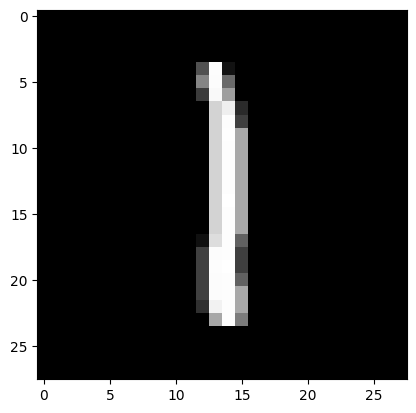

Prediction:  [5]
Label:  5


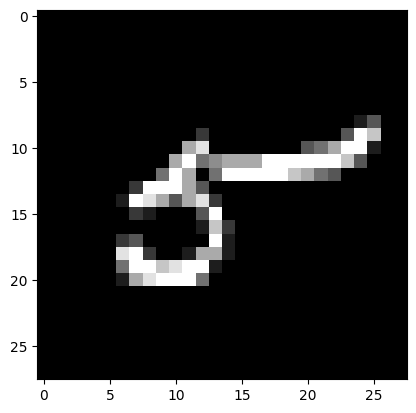

Prediction:  [1]
Label:  1


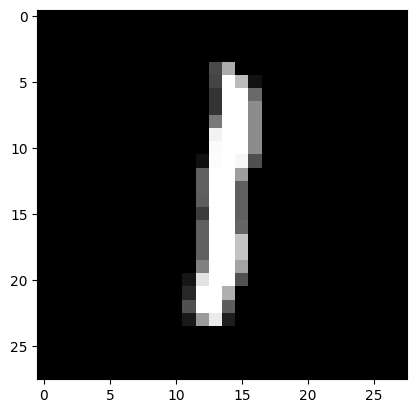

Prediction:  [7]
Label:  7


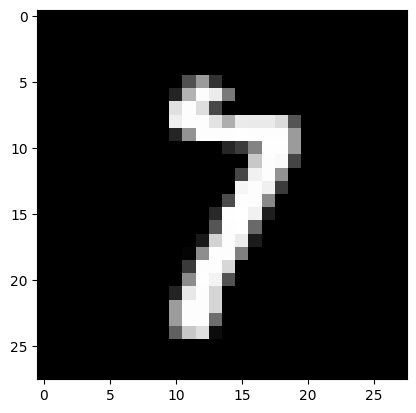

In [19]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)